# Urvi Shukla



## Data Science and Business Analytics Internship



Importing Libraries

In [12]:

import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
from scipy import stats 
from statistics import *

%matplotlib inline

Importing Dataset

In [13]:

df= pd.read_csv("Iris.csv")

Data Exploration
Shape of the data-

In [14]:
df.shape

(150, 6)

Our dataset consists of 150 rows and 6 columns.
Reading the first 7 values-

In [15]:
df.head(7)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa


Summary of the dataframe-

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Descriptive statistics of the dataframe-

In [17]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


Data Pre-Processing
Checking for any missing values-

In [18]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [19]:

li = df[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]]
z = np.abs(stats.zscore(li))

I have used Z-Score method to detect the outliers in our dataset. Any value which is greater than 3 or less than 3 is treated as outlier. Since, we have taken the absolute of our z-score, we just have to look for the values which are greater than 3.

In [20]:

new = list(np.where(z>3))
new

[array([15]), array([1])]

There is only one outlier present in our dataset, which is present at the 15th index in 2nd column(SepalWidthCm).

In [21]:
print("Shape of dataframe before removing the outliers:",df.shape)

index=new[0]
for i in index:
    df.drop(df.index[i],inplace=True)
    
print("Shape of dataframe after removing the outliers:",df.shape)

Shape of dataframe before removing the outliers: (150, 6)
Shape of dataframe after removing the outliers: (149, 6)


We will store the index value of the outlier in the 'index' variable and then remove it from our dataframe. It can be seen that the size of our dataframe is reduced by one. Now, our dataframe is free from outliers.

# Splitting the dataset

In [22]:

x = df.iloc[:, 1:5].values
y = df.iloc[:, -1].values

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method

In [23]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state = 0)

Training the Decision Tree Classification model on the Training set

In [24]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state = 0)
classifier.fit(x,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

Predicting the Test set results

In [25]:
y_pred = classifier.predict(X_test)

In [26]:
print(X_test)

[[6.1 2.6 5.6 1.4]
 [6.5 3.2 5.1 2. ]
 [5.  2.  3.5 1. ]
 [5.5 2.4 3.7 1. ]
 [5.  3.4 1.5 0.2]
 [7.6 3.  6.6 2.1]
 [6.9 3.1 5.1 2.3]
 [5.7 2.9 4.2 1.3]
 [6.  2.2 5.  1.5]
 [6.  3.4 4.5 1.6]
 [4.9 3.1 1.5 0.1]
 [4.8 3.  1.4 0.3]
 [5.7 2.8 4.5 1.3]
 [5.  3.  1.6 0.2]
 [4.4 3.  1.3 0.2]
 [6.3 2.8 5.1 1.5]
 [6.8 3.  5.5 2.1]
 [6.4 2.9 4.3 1.3]
 [5.1 3.5 1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.5 2.3 1.3 0.3]
 [4.4 2.9 1.4 0.2]
 [6.7 3.1 4.7 1.5]
 [5.1 3.3 1.7 0.5]
 [6.1 2.9 4.7 1.4]
 [5.7 3.  4.2 1.2]
 [6.1 3.  4.6 1.4]
 [5.2 3.5 1.5 0.2]
 [5.1 3.8 1.9 0.4]
 [7.7 3.  6.1 2.3]
 [5.2 3.4 1.4 0.2]
 [5.1 2.5 3.  1.1]
 [6.2 2.9 4.3 1.3]
 [5.9 3.2 4.8 1.8]
 [5.1 3.8 1.5 0.3]
 [4.9 2.5 4.5 1.7]
 [6.4 3.1 5.5 1.8]
 [6.  2.2 4.  1. ]
 [6.9 3.1 4.9 1.5]
 [4.7 3.2 1.3 0.2]
 [6.5 3.  5.2 2. ]
 [5.4 3.7 1.5 0.2]
 [4.9 2.4 3.3 1. ]
 [5.8 2.8 5.1 2.4]
 [6.7 3.3 5.7 2.5]
 [7.7 3.8 6.7 2.2]
 [5.8 2.7 4.1 1. ]
 [5.7 2.6 3.5 1. ]
 [6.3 2.5 4.9 1.5]
 [6.4 2.8 5.6 2.2]]


Visualizing our decision tree

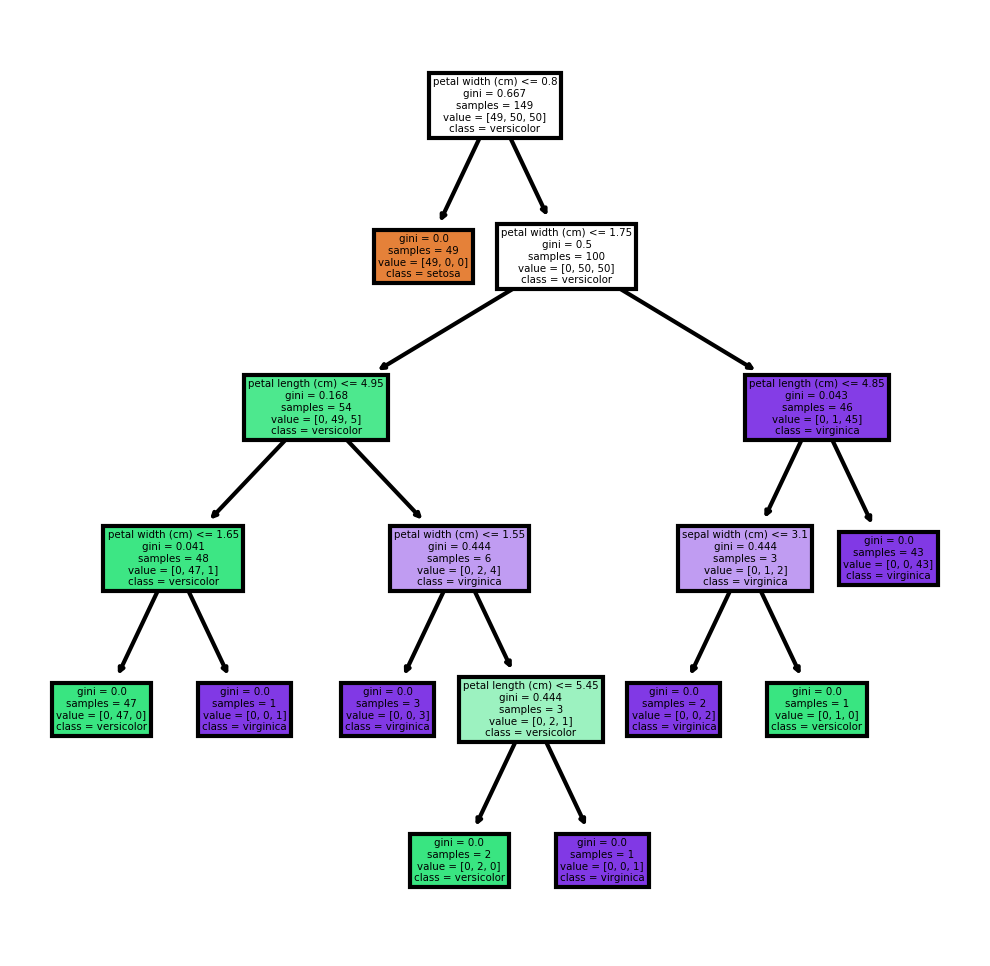

In [27]:
from sklearn import tree

fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(classifier,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('Decision_Tree.png')